In [1]:
import cv2
import os
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.utils import shuffle

In [2]:
path_no_tumor = 'C:/Users/Hp/Downloads/Compressed/proj/Brain_Tumor_Detection/no/'
path_tumor = 'C:/Users/Hp/Downloads/Compressed/proj/Brain_Tumor_Detection/yes/'

In [3]:
no_tumor_images = os.listdir(path_no_tumor)
tumor_images = os.listdir(path_tumor)
dataset = []
label = []

In [4]:
for image_name in no_tumor_images:
    image = cv2.imread(path_no_tumor + image_name)
    img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (128, 128))
    img = img / 255.0 
    dataset.append(img)
    label.append(0)

for image_name in tumor_images:
    image = cv2.imread(path_tumor + image_name)
    img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (128, 128))
    img = img / 255.0 
    dataset.append(img)
    label.append(1)

In [5]:
dataset = np.array(dataset)
label = np.array(label)
dataset, label = shuffle(dataset,label)
print(len(dataset))
print(dataset.shape)
print(label.shape)


2999
(2999, 128, 128)
(2999,)


In [8]:
X_train, X_test_val, y_train, y_test_val = train_test_split(dataset, label,test_size=0.3)
X_test, X_val , y_test, y_val = train_test_split( X_test_val, y_test_val, test_size=0.5)

In [9]:
print ("number of training examples = " + str(X_train.shape[0]))
print ("number of validation examples = " + str(X_val.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(y_train.shape))
print ("X_val shape: " + str(X_val.shape))
print ("Y_val shape: " + str(y_val.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(y_test.shape))

number of training examples = 2099
number of validation examples = 450
number of test examples = 450
X_train shape: (2099, 128, 128)
Y_train shape: (2099,)
X_val (dev) shape: (450, 128, 128)
Y_val (dev) shape: (450,)
X_test shape: (450, 128, 128)
Y_test shape: (450,)


In [10]:
model = Sequential()

model.add(Conv2D(64, (3, 3), input_shape=(128, 128, 1), padding='same',kernel_initializer='uniform',activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), padding='same',kernel_initializer='uniform',activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding='same',kernel_initializer='uniform',activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), padding='same',kernel_initializer='uniform',activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten()) 
model.add(Dense(64,activation='relu'))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer = 'adam',metrics=['accuracy'])



In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 64)      640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 64, 64, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        3

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=5)
model_checkpoint = ModelCheckpoint(filepath='best_model.h5', monitor='val_accuracy', save_best_only=True)
tensorboard = TensorBoard(log_dir='logs')

In [11]:
history = model.fit(X_train, y_train,epochs=20, validation_data=(X_val, y_val), 
                    callbacks=[early_stop, model_checkpoint, tensorboard],verbose=1)

Epoch 1/20
66/66 [==============================] - 60s 888ms/step - loss: 0.7167 - accuracy: 0.6984 - val_loss: 0.4950 - val_accuracy: 0.7622
Epoch 2/20
66/66 [==============================] - 60s 912ms/step - loss: 0.4400 - accuracy: 0.7918 - val_loss: 0.3697 - val_accuracy: 0.8311
Epoch 3/20
66/66 [==============================] - 62s 945ms/step - loss: 0.3113 - accuracy: 0.8628 - val_loss: 0.2742 - val_accuracy: 0.8822
Epoch 4/20
66/66 [==============================] - 62s 943ms/step - loss: 0.2307 - accuracy: 0.9076 - val_loss: 0.1901 - val_accuracy: 0.9289
Epoch 5/20
66/66 [==============================] - 64s 970ms/step - loss: 0.1925 - accuracy: 0.9257 - val_loss: 0.1900 - val_accuracy: 0.9200
Epoch 6/20
66/66 [==============================] - 64s 969ms/step - loss: 0.1423 - accuracy: 0.9466 - val_loss: 0.0953 - val_accuracy: 0.9867
Epoch 7/20
66/66 [==============================] - 63s 961ms/step - loss: 0.1089 - accuracy: 0.9590 - val_loss: 0.1185 - val_accuracy: 0.9578

In [12]:
model.evaluate(X_test,y_test,verbose=1)

15/15 [==============================] - 3s 180ms/step - loss: 0.0730 - accuracy: 0.9978


[0.07295689731836319, 0.9977777600288391]

In [13]:
model.save('9977-0729.h5')

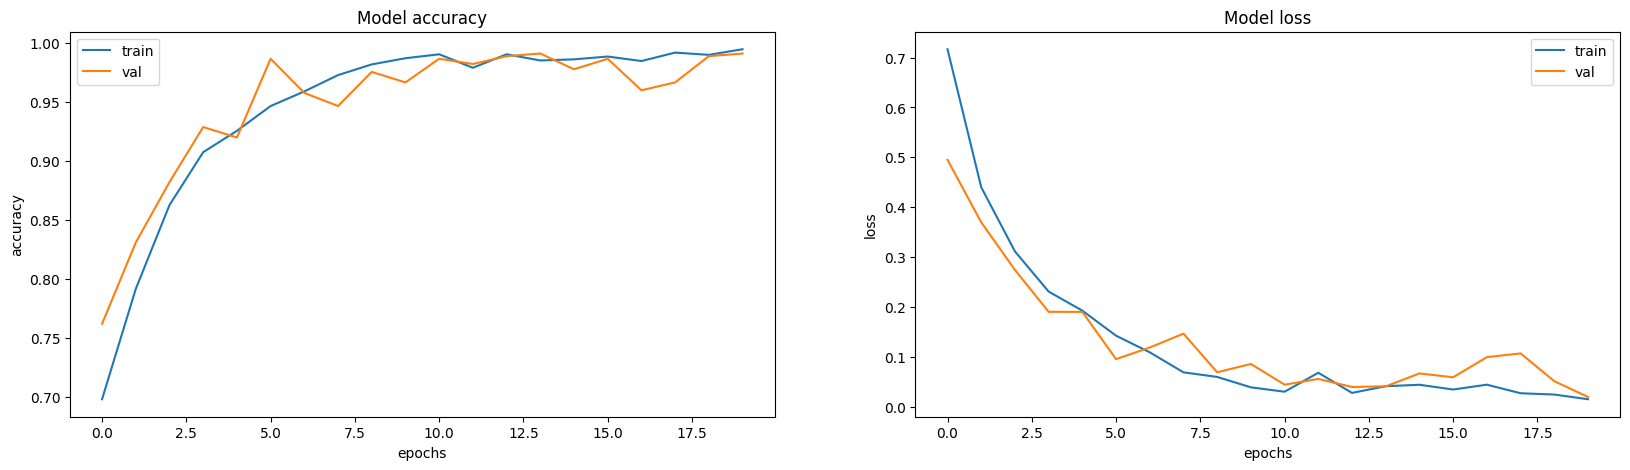

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(20, 5))

for i, met in enumerate(['accuracy', 'loss']):
    ax[i].plot(history.history[met])
    ax[i].plot(history.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])